In [1]:
import requests
from io import StringIO
import sqlite3
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [2]:

url = 'https://www.ncei.noaa.gov/access/services/data/v1'
response = requests.get(url)

In [3]:
url = 'https://www.ncei.noaa.gov/access/services/data/v1'
params = {
    'dataset': 'daily-summaries',
    'dataTypes': ['ACMH', 'ACSH', 'ADPT', 'ASLP', 'ASTP', 'AWBT', 'AWND', 'DAEV', 'DAPR', 'DAWM', 'EVAP', 'FMTM', 'FRGT', 'MDEV', 'MDPR',
                            'MDWM', 'MNPN', 'MXPN', 'PGTM', 'PRCP', 'PSUN', 'RHAV', 'RHMN', 'RHMX', 'SNOW', 'SNWD', 'TAVG', 'THIC', 'TMAX', 'TMIN',
                            'TOBS', 'TSUN', 'WDF1', 'WDF2', 'WDF5', 'WDFG', 'WDFM', 'WDMV', 'WESD', 'WESF', 'WSF1', 'WSF2', 'WSF5', 'WSFG', 'WSFM',
                            'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10', 'WT11', 'WT13', 'WT14', 'WT16', 'WT18',
                            'WT19', 'WT21', 'WT22', 'WV03'],
    'stations': ['US1AZPM0003',
            'USC00028817',
            'USC00028590',
            'USC00028815',
            'USC00022159',
            'USW00023160',
            'USW00023109',
            'USC00028800',
            'USC00028796',
            'USC00027355'],
    'startDate': '1893-01-01',
    'endDate': '2023-04-13',
    'boundingBox': '90,-180,-90,180',
    'includeAttributes': True,
    'includeStationName': True,
    'includeStationLocation': True,
    'units': 'metric',
    'format': 'csv'
}
response = requests.get(url, params=params)

if response.status_code == 200:  # If the response was successful
    csv_data = response.text  # Get the CSV data as a string
    # Do something with the CSV data, such as parse it with a library like pandas

else:
    print('Error:', response.status_code)

In [4]:
csv=StringIO(csv_data)
df=pd.read_csv(csv, low_memory=False)
df

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,ACMH,ACMH_ATTRIBUTES,ACSH,ACSH_ATTRIBUTES,...,WT18,WT18_ATTRIBUTES,WT19,WT19_ATTRIBUTES,WT21,WT21_ATTRIBUTES,WT22,WT22_ATTRIBUTES,WV03,WV03_ATTRIBUTES
0,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,2009-08-24,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,2009-08-25,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,2009-08-31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,2009-09-03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,2009-09-04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170143,USC00027355,"SABINO CANYON, AZ US",32.311100,-110.818600,804.7,1982-09-26,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170144,USC00027355,"SABINO CANYON, AZ US",32.311100,-110.818600,804.7,1982-09-27,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170145,USC00027355,"SABINO CANYON, AZ US",32.311100,-110.818600,804.7,1982-09-28,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170146,USC00027355,"SABINO CANYON, AZ US",32.311100,-110.818600,804.7,1982-09-29,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#df.dropna(axis=1, how='all')

In [6]:
pd.set_option('display.max_columns', 138)
pd.set_option('display.max_colwidth', 138)
df

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,ACMH,ACMH_ATTRIBUTES,ACSH,ACSH_ATTRIBUTES,ADPT,ADPT_ATTRIBUTES,ASLP,ASLP_ATTRIBUTES,ASTP,ASTP_ATTRIBUTES,AWBT,AWBT_ATTRIBUTES,AWND,AWND_ATTRIBUTES,DAEV,DAEV_ATTRIBUTES,DAPR,DAPR_ATTRIBUTES,DAWM,DAWM_ATTRIBUTES,EVAP,EVAP_ATTRIBUTES,FMTM,FMTM_ATTRIBUTES,FRGT,FRGT_ATTRIBUTES,MDEV,MDEV_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,MDWM,MDWM_ATTRIBUTES,MNPN,MNPN_ATTRIBUTES,MXPN,MXPN_ATTRIBUTES,PGTM,PGTM_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,PSUN,PSUN_ATTRIBUTES,RHAV,RHAV_ATTRIBUTES,RHMN,RHMN_ATTRIBUTES,RHMX,RHMX_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,THIC,THIC_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TOBS,TOBS_ATTRIBUTES,TSUN,TSUN_ATTRIBUTES,WDF1,WDF1_ATTRIBUTES,WDF2,WDF2_ATTRIBUTES,WDF5,WDF5_ATTRIBUTES,WDFG,WDFG_ATTRIBUTES,WDFM,WDFM_ATTRIBUTES,WDMV,WDMV_ATTRIBUTES,WESD,WESD_ATTRIBUTES,WESF,WESF_ATTRIBUTES,WSF1,WSF1_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES,WSFG,WSFG_ATTRIBUTES,WSFM,WSFM_ATTRIBUTES,WT01,WT01_ATTRIBUTES,WT02,WT02_ATTRIBUTES,WT03,WT03_ATTRIBUTES,WT04,WT04_ATTRIBUTES,WT05,WT05_ATTRIBUTES,WT06,WT06_ATTRIBUTES,WT07,WT07_ATTRIBUTES,WT08,WT08_ATTRIBUTES,WT09,WT09_ATTRIBUTES,WT10,WT10_ATTRIBUTES,WT11,WT11_ATTRIBUTES,WT13,WT13_ATTRIBUTES,WT14,WT14_ATTRIBUTES,WT16,WT16_ATTRIBUTES,WT18,WT18_ATTRIBUTES,WT19,WT19_ATTRIBUTES,WT21,WT21_ATTRIBUTES,WT22,WT22_ATTRIBUTES,WV03,WV03_ATTRIBUTES
0,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,2009-08-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,2009-08-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,2009-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,2009-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.3,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,2009-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5

In [7]:
Tucson = df

In [8]:
idd_dict = {'US1AZPM0003': 'T117',
            'USC00028817': 'UAN1',
            'USC00028590': 'CHUL',
            'USC00028815': 'FORE',
            'USC00022159': 'COR3',
            'USW00023160': 'AIRP',
            'USW00023109': 'DMAB',
            'USC00028800': 'MAGO',
            'USC00028796': 'CPAE',
            'USC00027355': 'SBNO'}

# add the IDD column to the dataframe and populate it with the values from the dictionary where the STATION column matches the keys in the dictionary
Tucson['IDD'] = Tucson['STATION'].map(idd_dict)
Tucson.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,ACMH,ACMH_ATTRIBUTES,ACSH,ACSH_ATTRIBUTES,ADPT,ADPT_ATTRIBUTES,ASLP,ASLP_ATTRIBUTES,ASTP,ASTP_ATTRIBUTES,AWBT,AWBT_ATTRIBUTES,AWND,AWND_ATTRIBUTES,DAEV,DAEV_ATTRIBUTES,DAPR,DAPR_ATTRIBUTES,DAWM,DAWM_ATTRIBUTES,EVAP,EVAP_ATTRIBUTES,FMTM,FMTM_ATTRIBUTES,FRGT,FRGT_ATTRIBUTES,MDEV,MDEV_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,MDWM,MDWM_ATTRIBUTES,MNPN,MNPN_ATTRIBUTES,MXPN,MXPN_ATTRIBUTES,PGTM,PGTM_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,PSUN,PSUN_ATTRIBUTES,RHAV,RHAV_ATTRIBUTES,RHMN,RHMN_ATTRIBUTES,RHMX,RHMX_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,THIC,THIC_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TOBS,TOBS_ATTRIBUTES,TSUN,TSUN_ATTRIBUTES,WDF1,WDF1_ATTRIBUTES,WDF2,WDF2_ATTRIBUTES,WDF5,WDF5_ATTRIBUTES,WDFG,WDFG_ATTRIBUTES,WDFM,WDFM_ATTRIBUTES,WDMV,WDMV_ATTRIBUTES,WESD,WESD_ATTRIBUTES,WESF,WESF_ATTRIBUTES,WSF1,WSF1_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES,WSFG,WSFG_ATTRIBUTES,WSFM,WSFM_ATTRIBUTES,WT01,WT01_ATTRIBUTES,WT02,WT02_ATTRIBUTES,WT03,WT03_ATTRIBUTES,WT04,WT04_ATTRIBUTES,WT05,WT05_ATTRIBUTES,WT06,WT06_ATTRIBUTES,WT07,WT07_ATTRIBUTES,WT08,WT08_ATTRIBUTES,WT09,WT09_ATTRIBUTES,WT10,WT10_ATTRIBUTES,WT11,WT11_ATTRIBUTES,WT13,WT13_ATTRIBUTES,WT14,WT14_ATTRIBUTES,WT16,WT16_ATTRIBUTES,WT18,WT18_ATTRIBUTES,WT19,WT19_ATTRIBUTES,WT21,WT21_ATTRIBUTES,WT22,WT22_ATTRIBUTES,WV03,WV03_ATTRIBUTES,IDD
0,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,2009-08-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T117
1,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,2009-08-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T117
2,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,2009-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T117
3,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,2009-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.3,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T117
4,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,2009-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [9]:
Tucson = Tucson.reindex(columns=['IDD'] + list(df.columns[:-1]))
Tucson.head()

,IDD,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,ACMH,ACMH_ATTRIBUTES,ACSH,ACSH_ATTRIBUTES,ADPT,ADPT_ATTRIBUTES,ASLP,ASLP_ATTRIBUTES,ASTP,ASTP_ATTRIBUTES,AWBT,AWBT_ATTRIBUTES,AWND,AWND_ATTRIBUTES,DAEV,DAEV_ATTRIBUTES,DAPR,DAPR_ATTRIBUTES,DAWM,DAWM_ATTRIBUTES,EVAP,EVAP_ATTRIBUTES,FMTM,FMTM_ATTRIBUTES,FRGT,FRGT_ATTRIBUTES,MDEV,MDEV_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,MDWM,MDWM_ATTRIBUTES,MNPN,MNPN_ATTRIBUTES,MXPN,MXPN_ATTRIBUTES,PGTM,PGTM_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,PSUN,PSUN_ATTRIBUTES,RHAV,RHAV_ATTRIBUTES,RHMN,RHMN_ATTRIBUTES,RHMX,RHMX_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,THIC,THIC_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TOBS,TOBS_ATTRIBUTES,TSUN,TSUN_ATTRIBUTES,WDF1,WDF1_ATTRIBUTES,WDF2,WDF2_ATTRIBUTES,WDF5,WDF5_ATTRIBUTES,WDFG,WDFG_ATTRIBUTES,WDFM,WDFM_ATTRIBUTES,WDMV,WDMV_ATTRIBUTES,WESD,WESD_ATTRIBUTES,WESF,WESF_ATTRIBUTES,WSF1,WSF1_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES,WSFG,WSFG_ATTRIBUTES,WSFM,WSFM_ATTRIBUTES,WT01,WT01_ATTRIBUTES,WT02,WT02_ATTRIBUTES,WT03,WT03_ATTRIBUTES,WT04,WT04_ATTRIBUTES,WT05,WT05_ATTRIBUTES,WT06,WT06_ATTRIBUTES,WT07,WT07_ATTRIBUTES,WT08,WT08_ATTRIBUTES,WT09,WT09_ATTRIBUTES,WT10,WT10_ATTRIBUTES,WT11,WT11_ATTRIBUTES,WT13,WT13_ATTRIBUTES,WT14,WT14_ATTRIBUTES,WT16,WT16_ATTRIBUTES,WT18,WT18_ATTRIBUTES,WT19,WT19_ATTRIBUTES,WT21,WT21_ATTRIBUTES,WT22,WT22_ATTRIBUTES,WV03,WV03_ATTRIBUTES
0,T117,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,2009-08-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T117,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,2009-08-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,T117,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,2009-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,T117,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,2009-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.3,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,T117,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,2009-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [10]:
Tucson['IDD'] = Tucson['IDD'].str.cat(Tucson['DATE'].str.replace('-', ''))
Tucson.head()

,IDD,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,ACMH,ACMH_ATTRIBUTES,ACSH,ACSH_ATTRIBUTES,ADPT,ADPT_ATTRIBUTES,ASLP,ASLP_ATTRIBUTES,ASTP,ASTP_ATTRIBUTES,AWBT,AWBT_ATTRIBUTES,AWND,AWND_ATTRIBUTES,DAEV,DAEV_ATTRIBUTES,DAPR,DAPR_ATTRIBUTES,DAWM,DAWM_ATTRIBUTES,EVAP,EVAP_ATTRIBUTES,FMTM,FMTM_ATTRIBUTES,FRGT,FRGT_ATTRIBUTES,MDEV,MDEV_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,MDWM,MDWM_ATTRIBUTES,MNPN,MNPN_ATTRIBUTES,MXPN,MXPN_ATTRIBUTES,PGTM,PGTM_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,PSUN,PSUN_ATTRIBUTES,RHAV,RHAV_ATTRIBUTES,RHMN,RHMN_ATTRIBUTES,RHMX,RHMX_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,THIC,THIC_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TOBS,TOBS_ATTRIBUTES,TSUN,TSUN_ATTRIBUTES,WDF1,WDF1_ATTRIBUTES,WDF2,WDF2_ATTRIBUTES,WDF5,WDF5_ATTRIBUTES,WDFG,WDFG_ATTRIBUTES,WDFM,WDFM_ATTRIBUTES,WDMV,WDMV_ATTRIBUTES,WESD,WESD_ATTRIBUTES,WESF,WESF_ATTRIBUTES,WSF1,WSF1_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES,WSFG,WSFG_ATTRIBUTES,WSFM,WSFM_ATTRIBUTES,WT01,WT01_ATTRIBUTES,WT02,WT02_ATTRIBUTES,WT03,WT03_ATTRIBUTES,WT04,WT04_ATTRIBUTES,WT05,WT05_ATTRIBUTES,WT06,WT06_ATTRIBUTES,WT07,WT07_ATTRIBUTES,WT08,WT08_ATTRIBUTES,WT09,WT09_ATTRIBUTES,WT10,WT10_ATTRIBUTES,WT11,WT11_ATTRIBUTES,WT13,WT13_ATTRIBUTES,WT14,WT14_ATTRIBUTES,WT16,WT16_ATTRIBUTES,WT18,WT18_ATTRIBUTES,WT19,WT19_ATTRIBUTES,WT21,WT21_ATTRIBUTES,WT22,WT22_ATTRIBUTES,WV03,WV03_ATTRIBUTES
0,T11720090824,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,2009-08-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T11720090825,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,2009-08-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,T11720090831,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,2009-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,T11720090903,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,2009-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.3,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,T11720090904,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,2009-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [11]:
connection = sqlite3.connect('TucsonWeather.db')
Tucson.to_sql('Tucson', connection, if_exists='replace', index=False)
connection.close()

In [12]:

def query(query, database='TucsonWeather.db'):
    # Connect to the database
    connection = sqlite3.connect(database)
    cursor = connection.cursor()

    try:
        # Execute the query
        cursor.execute(query)

        # If the query is a SELECT statement, fetch the result
        if query.strip().lower().startswith("select"):
            # Get the column names from cursor.description
            column_names = [desc[0] for desc in cursor.description]
            # Fetch the rows
            rows = cursor.fetchall()
            # Combine column names and rows
            result = [column_names] + rows
        else:
            # If the query is not a SELECT statement (e.g., CREATE, INSERT, UPDATE, DELETE, etc.), commit the changes
            connection.commit()
            result = None

    except sqlite3.Error as error:
        print(f"Error executing query: {error}")
        result = None

    finally:
        # Close the cursor and the connection
        cursor.close()
        connection.close()

    return result


In [13]:
q='''SELECT *
    FROM Tucson'''
q_r=query(q)

In [14]:
def as_dataframe(q_result):
    return pd.DataFrame(data=q_result[1:], columns=q_result[0])

In [15]:
as_dataframe(q_r)

,IDD,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,ACMH,ACMH_ATTRIBUTES,ACSH,ACSH_ATTRIBUTES,ADPT,ADPT_ATTRIBUTES,ASLP,ASLP_ATTRIBUTES,ASTP,ASTP_ATTRIBUTES,AWBT,AWBT_ATTRIBUTES,AWND,AWND_ATTRIBUTES,DAEV,DAEV_ATTRIBUTES,DAPR,DAPR_ATTRIBUTES,DAWM,DAWM_ATTRIBUTES,EVAP,EVAP_ATTRIBUTES,FMTM,FMTM_ATTRIBUTES,FRGT,FRGT_ATTRIBUTES,MDEV,MDEV_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,MDWM,MDWM_ATTRIBUTES,MNPN,MNPN_ATTRIBUTES,MXPN,MXPN_ATTRIBUTES,PGTM,PGTM_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,PSUN,PSUN_ATTRIBUTES,RHAV,RHAV_ATTRIBUTES,RHMN,RHMN_ATTRIBUTES,RHMX,RHMX_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,THIC,THIC_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TOBS,TOBS_ATTRIBUTES,TSUN,TSUN_ATTRIBUTES,WDF1,WDF1_ATTRIBUTES,WDF2,WDF2_ATTRIBUTES,WDF5,WDF5_ATTRIBUTES,WDFG,WDFG_ATTRIBUTES,WDFM,WDFM_ATTRIBUTES,WDMV,WDMV_ATTRIBUTES,WESD,WESD_ATTRIBUTES,WESF,WESF_ATTRIBUTES,WSF1,WSF1_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES,WSFG,WSFG_ATTRIBUTES,WSFM,WSFM_ATTRIBUTES,WT01,WT01_ATTRIBUTES,WT02,WT02_ATTRIBUTES,WT03,WT03_ATTRIBUTES,WT04,WT04_ATTRIBUTES,WT05,WT05_ATTRIBUTES,WT06,WT06_ATTRIBUTES,WT07,WT07_ATTRIBUTES,WT08,WT08_ATTRIBUTES,WT09,WT09_ATTRIBUTES,WT10,WT10_ATTRIBUTES,WT11,WT11_ATTRIBUTES,WT13,WT13_ATTRIBUTES,WT14,WT14_ATTRIBUTES,WT16,WT16_ATTRIBUTES,WT18,WT18_ATTRIBUTES,WT19,WT19_ATTRIBUTES,WT21,WT21_ATTRIBUTES,WT22,WT22_ATTRIBUTES,WV03,WV03_ATTRIBUTES
0,T11720090824,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,2009-08-24,NaN,None,NaN,None,None,None,None,None,None,None,None,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,0.0,",,N",NaN,None,None,None,None,None,None,None,0.0,",,N",NaN,None,NaN,None,None,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None
1,T11720090825,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,2009-08-25,NaN,None,NaN,None,None,None,None,None,None,None,None,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,0.0,",,N",NaN,None,None,None,None,None,None,None,0.0,",,N",NaN,None,NaN,None,None,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None
2,T11720090831,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,2009-08-31,NaN,None,NaN,None,None,None,None,None,None,None,None,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,0.0,",,N",NaN,None,None,None,None,None,None,None,0.0,",,N",NaN,None,NaN,None,None,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None
3,T11720090903,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,2009-09-03,NaN,None,NaN,None,None,None,None,None,None,None,None,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,21.3,",,N",NaN,None,None,None,None,None,None,None,NaN,None,NaN,None,NaN,None,None,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,

In [16]:
q='''CREATE TABLE Stations AS
    SELECT DISTINCT STATION, NAME, LATITUDE, LONGITUDE, ELEVATION
    FROM Tucson;
    '''
query(q)
q='''SELECT *
    FROM Stations;
    '''
q_r=query(q)
as_dataframe(q_r)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION
0,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6
1,USC00028817,"TUCSON U OF A NUMBER 1, AZ US",32.258000,-111.005200,705.6
2,USC00028590,"TOHONO CHUL, AZ US",32.339100,-110.980800,770.2
3,USC00028815,"TUCSON WEATHER FORECAST OFFICE, AZ US",32.229170,-110.953610,742.2
4,USC00022159,"CORTARO 3 SW, AZ US",32.333330,-111.116670,691.9
5,USW00023160,"TUCSON INTERNATIONAL AIRPORT, AZ US",32.131530,-110.956380,777.6
6,USW00023109,"DAVIS MONTHAN AFB, AZ US",32.166670,-110.883330,824.2
7,USC00028800,"TUCSON MAGNETIC OBSERVATORY, AZ US",32.250000,-110.833330,769.9
8,USC00028796,"TUCSON CP AVE EXPERIMENTAL FM, AZ US",32.281600,-110.944100,710.2
9,USC00027355,"SABINO CANYON, AZ US",32.311100,-110.818600,804.7


In [17]:
q = '''ALTER TABLE Stations
ADD ID VARCHAR(4);
'''
query(q)

In [18]:
q='''SELECT *
    FROM Stations
    ;'''
q_r=query(q)
ID_temp= as_dataframe(q_r)
ID_vals = ['T117', 'UAN1', 'CHUL', 'FORE', 'COR3', 'AIRP', 'DMAB', 'MAGO', 'CPAE', 'SBNO']

# use the loc accessor to select the 'Name' column and assign the new values
ID_temp['ID'] = ID_vals
ID_temp

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,ID
0,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,T117
1,USC00028817,"TUCSON U OF A NUMBER 1, AZ US",32.258000,-111.005200,705.6,UAN1
2,USC00028590,"TOHONO CHUL, AZ US",32.339100,-110.980800,770.2,CHUL
3,USC00028815,"TUCSON WEATHER FORECAST OFFICE, AZ US",32.229170,-110.953610,742.2,FORE
4,USC00022159,"CORTARO 3 SW, AZ US",32.333330,-111.116670,691.9,COR3
5,USW00023160,"TUCSON INTERNATIONAL AIRPORT, AZ US",32.131530,-110.956380,777.6,AIRP
6,USW00023109,"DAVIS MONTHAN AFB, AZ US",32.166670,-110.883330,824.2,DMAB
7,USC00028800,"TUCSON MAGNETIC OBSERVATORY, AZ US",32.250000,-110.833330,769.9,MAGO
8,USC00028796,"TUCSON CP AVE EXPERIMENTAL FM, AZ US",32.281600,-110.944100,710.2,CPAE
9,USC00027355,"SABINO CANYON, AZ US",32.311100,-110.818600,804.7,SBNO


In [19]:
ID_temp = ID_temp.reindex(columns=['ID'] + list(df.columns[:-1]))
ID_temp.head()

,ID,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,ACMH,ACMH_ATTRIBUTES,ACSH,ACSH_ATTRIBUTES,ADPT,ADPT_ATTRIBUTES,ASLP,ASLP_ATTRIBUTES,ASTP,ASTP_ATTRIBUTES,AWBT,AWBT_ATTRIBUTES,AWND,AWND_ATTRIBUTES,DAEV,DAEV_ATTRIBUTES,DAPR,DAPR_ATTRIBUTES,DAWM,DAWM_ATTRIBUTES,EVAP,EVAP_ATTRIBUTES,FMTM,FMTM_ATTRIBUTES,FRGT,FRGT_ATTRIBUTES,MDEV,MDEV_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,MDWM,MDWM_ATTRIBUTES,MNPN,MNPN_ATTRIBUTES,MXPN,MXPN_ATTRIBUTES,PGTM,PGTM_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,PSUN,PSUN_ATTRIBUTES,RHAV,RHAV_ATTRIBUTES,RHMN,RHMN_ATTRIBUTES,RHMX,RHMX_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,THIC,THIC_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TOBS,TOBS_ATTRIBUTES,TSUN,TSUN_ATTRIBUTES,WDF1,WDF1_ATTRIBUTES,WDF2,WDF2_ATTRIBUTES,WDF5,WDF5_ATTRIBUTES,WDFG,WDFG_ATTRIBUTES,WDFM,WDFM_ATTRIBUTES,WDMV,WDMV_ATTRIBUTES,WESD,WESD_ATTRIBUTES,WESF,WESF_ATTRIBUTES,WSF1,WSF1_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES,WSFG,WSFG_ATTRIBUTES,WSFM,WSFM_ATTRIBUTES,WT01,WT01_ATTRIBUTES,WT02,WT02_ATTRIBUTES,WT03,WT03_ATTRIBUTES,WT04,WT04_ATTRIBUTES,WT05,WT05_ATTRIBUTES,WT06,WT06_ATTRIBUTES,WT07,WT07_ATTRIBUTES,WT08,WT08_ATTRIBUTES,WT09,WT09_ATTRIBUTES,WT10,WT10_ATTRIBUTES,WT11,WT11_ATTRIBUTES,WT13,WT13_ATTRIBUTES,WT14,WT14_ATTRIBUTES,WT16,WT16_ATTRIBUTES,WT18,WT18_ATTRIBUTES,WT19,WT19_ATTRIBUTES,WT21,WT21_ATTRIBUTES,WT22,WT22_ATTRIBUTES,WV03,WV03_ATTRIBUTES
0,T117,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,UAN1,USC00028817,"TUCSON U OF A NUMBER 1, AZ US",32.258000,-111.005200,705.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CHUL,USC00028590,"TOHONO CHUL, AZ US",32.339100,-110.980800,770.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FORE,USC00028815,"TUCSON WEATHER FORECAST OFFICE, AZ US",32.229170,-110.953610,742.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,COR3,USC00022159,"CORTARO 3 SW, AZ US",32.333330,-111.116670,691.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [20]:
conn = sqlite3.connect('TucsonWeather.db')

# Replace the existing table and maintain the index
ID_temp.to_sql('Stations', conn, if_exists='replace', index=False)

10

In [21]:
q='''SELECT *
    FROM Stations;
    '''
q_r=query(q)
as_dataframe(q_r)

,ID,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,ACMH,ACMH_ATTRIBUTES,ACSH,ACSH_ATTRIBUTES,ADPT,ADPT_ATTRIBUTES,ASLP,ASLP_ATTRIBUTES,ASTP,ASTP_ATTRIBUTES,AWBT,AWBT_ATTRIBUTES,AWND,AWND_ATTRIBUTES,DAEV,DAEV_ATTRIBUTES,DAPR,DAPR_ATTRIBUTES,DAWM,DAWM_ATTRIBUTES,EVAP,EVAP_ATTRIBUTES,FMTM,FMTM_ATTRIBUTES,FRGT,FRGT_ATTRIBUTES,MDEV,MDEV_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,MDWM,MDWM_ATTRIBUTES,MNPN,MNPN_ATTRIBUTES,MXPN,MXPN_ATTRIBUTES,PGTM,PGTM_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,PSUN,PSUN_ATTRIBUTES,RHAV,RHAV_ATTRIBUTES,RHMN,RHMN_ATTRIBUTES,RHMX,RHMX_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,THIC,THIC_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TOBS,TOBS_ATTRIBUTES,TSUN,TSUN_ATTRIBUTES,WDF1,WDF1_ATTRIBUTES,WDF2,WDF2_ATTRIBUTES,WDF5,WDF5_ATTRIBUTES,WDFG,WDFG_ATTRIBUTES,WDFM,WDFM_ATTRIBUTES,WDMV,WDMV_ATTRIBUTES,WESD,WESD_ATTRIBUTES,WESF,WESF_ATTRIBUTES,WSF1,WSF1_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES,WSFG,WSFG_ATTRIBUTES,WSFM,WSFM_ATTRIBUTES,WT01,WT01_ATTRIBUTES,WT02,WT02_ATTRIBUTES,WT03,WT03_ATTRIBUTES,WT04,WT04_ATTRIBUTES,WT05,WT05_ATTRIBUTES,WT06,WT06_ATTRIBUTES,WT07,WT07_ATTRIBUTES,WT08,WT08_ATTRIBUTES,WT09,WT09_ATTRIBUTES,WT10,WT10_ATTRIBUTES,WT11,WT11_ATTRIBUTES,WT13,WT13_ATTRIBUTES,WT14,WT14_ATTRIBUTES,WT16,WT16_ATTRIBUTES,WT18,WT18_ATTRIBUTES,WT19,WT19_ATTRIBUTES,WT21,WT21_ATTRIBUTES,WT22,WT22_ATTRIBUTES,WV03,WV03_ATTRIBUTES
0,T117,US1AZPM0003,"TUCSON 11.7 NNW, AZ US",32.347742,-110.980251,773.6,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,UAN1,USC00028817,"TUCSON U OF A NUMBER 1, AZ US",32.258000,-111.005200,705.6,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,CHUL,USC00028590,"TOHONO CHUL, AZ US",32.339100,-110.980800,770.2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,FORE,USC00028815,"TUCSON WEATHER FORECAST OFFICE, AZ US",32.229170,-110.953610,742.2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None

In [22]:
q='''DROP TABLE IF EXISTS Temps
    ;'''
query(q)

q='''CREATE TABLE Temps AS
    SELECT IDD, DATE, STATION, ADPT, TAVG, TMAX, TMIN, TOBS
    FROM Tucson
    ;'''
query(q)

q='''SELECT *
    FROM Temps
    ;'''
q_r=query(q)
as_dataframe(q_r)

,IDD,DATE,STATION,ADPT,TAVG,TMAX,TMIN,TOBS
0,T11720090824,2009-08-24,US1AZPM0003,None,NaN,NaN,NaN,NaN
1,T11720090825,2009-08-25,US1AZPM0003,None,NaN,NaN,NaN,NaN
2,T11720090831,2009-08-31,US1AZPM0003,None,NaN,NaN,NaN,NaN
3,T11720090903,2009-09-03,US1AZPM0003,None,NaN,NaN,NaN,NaN
4,T11720090904,2009-09-04,US1AZPM0003,None,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
170143,SBNO19820926,1982-09-26,USC00027355,None,NaN,36.1,22.2,30.6
170144,SBNO19820927,1982-09-27,USC00027355,None,NaN,31.7,19.4,25.0
170145,SBNO19820928,1982-09-28,USC00027355,None,NaN,27.2,13.3,22.8
170146,SBNO19820929,1982-09-29,USC00027355,None,NaN,32.8,11.1,28.3


In [23]:
temp_temp=as_dataframe(q_r)
temp_temp.dropna(subset=['ADPT', 'TAVG', 'TMAX', 'TMIN', 'TOBS'], how='all', inplace=True)
temp_temp.head()

,IDD,DATE,STATION,ADPT,TAVG,TMAX,TMIN,TOBS
4786,UAN119820501,1982-05-01,USC00028817,None,NaN,31.1,17.8,20.0
4787,UAN119820502,1982-05-02,USC00028817,None,NaN,30.6,17.2,31.1
4788,UAN119820503,1982-05-03,USC00028817,None,NaN,33.3,13.3,31.7
4789,UAN119820504,1982-05-04,USC00028817,None,NaN,31.7,17.8,22.2
4790,UAN119820505,1982-05-05,USC00028817,None,NaN,23.3,10.6,20.6


In [24]:
df['TMAX'].isnull().any()

True

In [25]:
df['TMIN'].isnull().any()

True

In [26]:
conn = sqlite3.connect('TucsonWeather.db')

# Replace the existing table and maintain the index
temp_temp.to_sql('Temps', conn, if_exists='replace', index=False)

164694

In [27]:
q='''SELECT *
    FROM Temps
    ;'''
q_r=query(q)
as_dataframe(q_r)

,IDD,DATE,STATION,ADPT,TAVG,TMAX,TMIN,TOBS
0,UAN119820501,1982-05-01,USC00028817,None,NaN,31.1,17.8,20.0
1,UAN119820502,1982-05-02,USC00028817,None,NaN,30.6,17.2,31.1
2,UAN119820503,1982-05-03,USC00028817,None,NaN,33.3,13.3,31.7
3,UAN119820504,1982-05-04,USC00028817,None,NaN,31.7,17.8,22.2
4,UAN119820505,1982-05-05,USC00028817,None,NaN,23.3,10.6,20.6
...,...,...,...,...,...,...,...,...
164689,SBNO19820926,1982-09-26,USC00027355,None,NaN,36.1,22.2,30.6
164690,SBNO19820927,1982-09-27,USC00027355,None,NaN,31.7,19.4,25.0
164691,SBNO19820928,1982-09-28,USC00027355,None,NaN,27.2,13.3,22.8
164692,SBNO19820929,1982-09-29,USC00027355,None,NaN,32.8,11.1,28.3


In [28]:
q='''CREATE TABLE Avg_Temps AS
    SELECT DATE, AVG(TMAX) AS TMAX, AVG(TMIN) AS TMIN
    FROM Temps
    GROUP BY DATE
    ;'''
query(q)

q='''SELECT *
    FROM Avg_Temps
    ;'''
q_r=query(q)
as_dataframe(q_r)

,DATE,TMAX,TMIN
0,1893-01-01,16.1,-1.70
1,1893-01-02,16.7,-2.80
2,1893-01-03,20.0,1.10
3,1893-01-04,18.3,1.10
4,1893-01-05,18.9,1.10
...,...,...,...
47485,2023-04-09,31.4,11.40
47486,2023-04-10,36.1,12.80
47487,2023-04-11,34.7,15.25
47488,2023-04-12,35.0,17.50


In [29]:
q='''DROP TABLE IF EXISTS Wind
    ;'''
query(q)

q='''CREATE TABLE Wind AS
    SELECT IDD, DATE, STATION, AWND, WDF1, WDF2, WDF5, WDFG, WDFM, WDMV, WSF1, WSF2, WSF5, WSFG, WSFM
    FROM Tucson
    ;'''
query(q)

q='''SELECT *
    FROM Wind
    ;'''
q_r=query(q)
as_dataframe(q_r)

,IDD,DATE,STATION,AWND,WDF1,WDF2,WDF5,WDFG,WDFM,WDMV,WSF1,WSF2,WSF5,WSFG,WSFM
0,T11720090824,2009-08-24,US1AZPM0003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T11720090825,2009-08-25,US1AZPM0003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,T11720090831,2009-08-31,US1AZPM0003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,T11720090903,2009-09-03,US1AZPM0003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,T11720090904,2009-09-04,US1AZPM0003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170143,SBNO19820926,1982-09-26,USC00027355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170144,SBNO19820927,1982-09-27,USC00027355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170145,SBNO19820928,1982-09-28,USC00027355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170146,SBNO19820929,1982-09-29,USC00027355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
Wind_temp=as_dataframe(q_r)
Wind_temp=as_dataframe(q_r)
Wind_temp.dropna(subset=['AWND','WDF1','WDF2','WDF5','WDFG','WDFM','WDMV','WSF1','WSF2','WSF5','WSFG','WSFM'], how='all', inplace=True)
Wind_temp.head()

,IDD,DATE,STATION,AWND,WDF1,WDF2,WDF5,WDFG,WDFM,WDMV,WSF1,WSF2,WSF5,WSFG,WSFM
4817,UAN119820601,1982-06-01,USC00028817,NaN,NaN,NaN,NaN,NaN,NaN,109.0,NaN,NaN,NaN,NaN,NaN
4818,UAN119820602,1982-06-02,USC00028817,NaN,NaN,NaN,NaN,NaN,NaN,106.0,NaN,NaN,NaN,NaN,NaN
4819,UAN119820603,1982-06-03,USC00028817,NaN,NaN,NaN,NaN,NaN,NaN,113.0,NaN,NaN,NaN,NaN,NaN
4820,UAN119820604,1982-06-04,USC00028817,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN
4821,UAN119820605,1982-06-05,USC00028817,NaN,NaN,NaN,NaN,NaN,NaN,98.0,NaN,NaN,NaN,NaN,NaN


In [31]:
q='''DROP TABLE Avg_Wind
    ;'''
query(q)

q='''CREATE TABLE Avg_Wind AS
    SELECT DATE, AVG(AWND) AS AWND
    FROM Wind
    GROUP BY DATE
    ;'''
query(q)

q='''SELECT *
    FROM Avg_Wind
    ;'''
q_r=query(q)
as_dataframe(q_r)

Error executing query: no such table: Avg_Wind


,DATE,AWND
0,1893-01-01,NaN
1,1893-01-02,NaN
2,1893-01-03,NaN
3,1893-01-04,NaN
4,1893-01-05,NaN
...,...,...
47501,2023-04-09,2.2
47502,2023-04-10,3.3
47503,2023-04-11,3.1
47504,2023-04-12,3.7


In [32]:
q='''DELETE FROM Avg_Wind
    WHERE AWND IS NULL
    ;'''
query(q)

q='''SELECT *
    FROM Avg_Wind
    ;'''
q_r=query(q)
as_dataframe(q_r)

,DATE,AWND
0,1984-01-01,2.9
1,1984-01-02,6.7
2,1984-01-03,5.7
3,1984-01-04,6.1
4,1984-01-05,4.1
...,...,...
14324,2023-04-09,2.2
14325,2023-04-10,3.3
14326,2023-04-11,3.1
14327,2023-04-12,3.7


In [33]:
Avg_Wind_temp = as_dataframe(q_r)
Avg_Wind_temp = Avg_Wind_temp.dropna(subset=['AWND'], how='all')
Avg_Wind_temp.head()

,DATE,AWND
0,1984-01-01,2.9
1,1984-01-02,6.7
2,1984-01-03,5.7
3,1984-01-04,6.1
4,1984-01-05,4.1


In [34]:
q='''DROP TABLE IF EXISTS Daily_Joined
    ;'''
query(q)

q='''CREATE TABLE Daily_Joined AS
    SELECT Avg_Temps.DATE, Avg_Temps.TMAX,Avg_Temps.TMIN, Avg_Wind.AWND
    FROM Avg_Temps
    INNER JOIN Avg_Wind
    ON Avg_Temps.DATE = Avg_Wind.DATE
    ;'''
query(q)

q='''SELECT *
    FROM Daily_Joined
    ;'''
q_r=query(q)
as_dataframe(q_r)

,DATE,TMAX,TMIN,AWND
0,1984-01-01,20.02,3.68,2.9
1,1984-01-02,16.10,8.32,6.7
2,1984-01-03,15.00,7.88,5.7
3,1984-01-04,19.44,6.56,6.1
4,1984-01-05,19.58,8.78,4.1
...,...,...,...,...
14324,2023-04-09,31.40,11.40,2.2
14325,2023-04-10,36.10,12.80,3.3
14326,2023-04-11,34.70,15.25,3.1
14327,2023-04-12,35.00,17.50,3.7


In [35]:
Daily_Joined_temp = as_dataframe(q_r)
Daily_Joined_temp = Daily_Joined_temp.dropna(subset=['AWND'], how='all')
Daily_Joined_temp.head()

,DATE,TMAX,TMIN,AWND
0,1984-01-01,20.02,3.68,2.9
1,1984-01-02,16.10,8.32,6.7
2,1984-01-03,15.00,7.88,5.7
3,1984-01-04,19.44,6.56,6.1
4,1984-01-05,19.58,8.78,4.1


In [36]:
conn = sqlite3.connect('TucsonWeather.db')

# Replace the existing table and maintain the index
Daily_Joined_temp.to_sql('Daily_Joined', conn, if_exists='replace', index=False)

14329

In [37]:
q='''SELECT *
    FROM Daily_Joined
    ;'''
q_r=query(q)
joined_temp=as_dataframe(q_r)

In [38]:
joined_temp['DATE'].min()

'1984-01-01'

In [39]:
q='''SELECT *
    FROM Avg_Temps
    ;'''
q_r=query(q)
avg_day=as_dataframe(q_r)

In [40]:
def is_leap_year(year):
    return (year % 4 == 0) and (year % 100 != 0) or (year % 400 == 0)

# Adjust day of the year for leap years after February 28th
def adjust_doy(row):
    date = row['DATE']
    if is_leap_year(date.year) and (date.month > 2):
        return date.timetuple().tm_yday - 1
    return date.timetuple().tm_yday

In [41]:
avg_day['DATE'] = pd.to_datetime(avg_day['DATE'])

# Filter out leap year days (February 29th)
avg_day = avg_day[~((avg_day['DATE'].dt.month == 2) & (avg_day['DATE'].dt.day == 29))]

# Create a new column with day of the year
avg_day['DOY'] = avg_day.apply(adjust_doy, axis=1)

# Group by day of the year and calculate the mean temperature
avg_day = avg_day.groupby('DOY')['TMAX', 'TMIN'].mean()

avg_day

C:\Users\Dessa\AppData\Local\Temp\ipykernel_23172\3902948779.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_day = avg_day.groupby('DOY')['TMAX', 'TMIN'].mean()


,TMAX,TMIN
DOY,,
1,17.422597,1.738161
2,17.476910,1.448921
3,17.597543,1.588053
4,17.895380,1.387161
5,18.141312,1.721443
...,...,...
361,17.858007,1.792163
362,17.936020,1.815103
363,17.645238,2.142934


In [42]:
q='''SELECT *
    FROM Avg_Wind
    ;'''
q_r=query(q)
wnd_doy=as_dataframe(q_r)

In [43]:
wnd_doy['DATE'] = pd.to_datetime(wnd_doy['DATE'])

# Filter out leap year days (February 29th)
wnd_doyy = wnd_doy[~((wnd_doy['DATE'].dt.month == 2) & (wnd_doy['DATE'].dt.day == 29))]

# Create a new column with day of the year
wnd_doy['DOY'] = wnd_doy.apply(adjust_doy, axis=1)

# Group by day of the year and calculate the mean temperature
wnd_doy = wnd_doy.groupby('DOY').mean()

wnd_doy

,AWND
DOY,
1,2.982051
2,3.689744
3,3.438462
4,3.067500
5,3.052500
...,...
361,2.917949
362,2.900000
363,2.992105


In [44]:
DOY_Avg = wnd_doy.join(avg_day, how='inner')
DOY_Avg

,AWND,TMAX,TMIN
DOY,,,
1,2.982051,17.422597,1.738161
2,3.689744,17.476910,1.448921
3,3.438462,17.597543,1.588053
4,3.067500,17.895380,1.387161
5,3.052500,18.141312,1.721443
...,...,...,...
361,2.917949,17.858007,1.792163
362,2.900000,17.936020,1.815103
363,2.992105,17.645238,2.142934


In [45]:
joined_temp['DATE'] = pd.to_datetime(joined_temp['DATE'])
# Calculate the day of the year for each date in Daily_Joined
joined_temp['DOY'] = joined_temp['DATE'].dt.dayofyear

# Merge the Daily_Joined and DOY_Avg dataframes based on the day of the year
merged_df = joined_temp.merge(DOY_Avg, on='DOY', suffixes=('', '_Avg'))

# Calculate the differences for TMAX, TMIN, and AWND
merged_df['TMAX_diff'] = merged_df['TMAX'] - merged_df['TMAX_Avg']
merged_df['TMIN_diff'] = merged_df['TMIN'] - merged_df['TMIN_Avg']
merged_df['AWND_diff'] = merged_df['AWND'] - merged_df['AWND_Avg']

# Create the diff_table dataframe with the calculated differences
diff_table = merged_df[['DATE', 'TMAX_diff', 'TMIN_diff', 'AWND_diff']]
diff_table

,DATE,TMAX_diff,TMIN_diff,AWND_diff
0,1984-01-01,2.597403,1.941839,-0.082051
1,1985-01-01,-2.322597,0.041839,0.217949
2,1986-01-01,3.577403,2.601839,-0.482051
3,1987-01-01,2.577403,-0.398161,-0.682051
4,1988-01-01,-2.202597,-0.958161,-0.782051
...,...,...,...,...
14315,2018-12-31,-5.412187,-1.752980,2.157895
14316,2019-12-31,-2.912187,0.147020,1.457895
14317,2020-12-30,-3.162187,-1.752980,-0.642105
14318,2021-12-31,0.937813,5.997020,0.757895


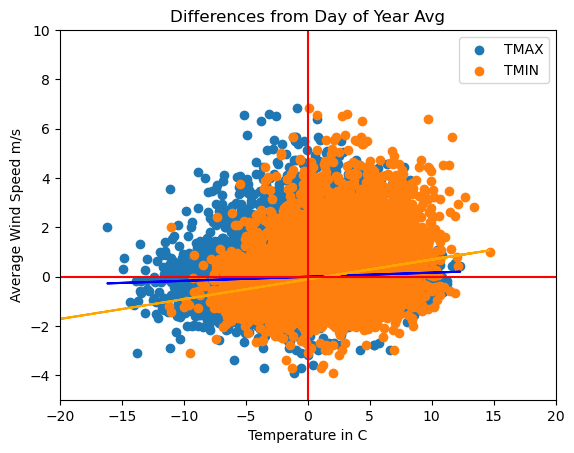

In [66]:
# Create a scatter plot with TMAX_diff and TMIN_diff on the x-axis and AWND_diff on the y-axis
plt.scatter(diff_table['TMAX_diff'], diff_table['AWND_diff'], label='TMAX')
plt.scatter(diff_table['TMIN_diff'], diff_table['AWND_diff'], label='TMIN')

# Calculate the regression line for TMAX_diff and plot it
x = diff_table['TMAX_diff']
y = diff_table['AWND_diff']
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(x, y)
plt.plot(x, slope * x + intercept, color='blue')

# Calculate the regression line for TMIN_diff and plot it
x = diff_table['TMIN_diff']
y = diff_table['AWND_diff']
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(x, y)
plt.plot(x, slope * x + intercept, color='orange')

# Set the limits for the x-axis and y-axis
plt.xlim(-20, 20)
plt.ylim(-5, 10)

plt.axhline(y=0, color='red', linestyle='-')
plt.axvline(x=0, color='red', linestyle='-')

# Set the labels for the x-axis, y-axis, and title of the plot
plt.xlabel('Temperature in C')
plt.ylabel('Average Wind Speed m/s')
plt.title('Differences from Day of Year Avg (1984-2023)')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


In [47]:
q='''SELECT *
    FROM Avg_Temps
    ;'''
q_r=query(q)
daily_temps_all=as_dataframe(q_r)
daily_temps_all

,DATE,TMAX,TMIN
0,1893-01-01,16.1,-1.70
1,1893-01-02,16.7,-2.80
2,1893-01-03,20.0,1.10
3,1893-01-04,18.3,1.10
4,1893-01-05,18.9,1.10
...,...,...,...
47485,2023-04-09,31.4,11.40
47486,2023-04-10,36.1,12.80
47487,2023-04-11,34.7,15.25
47488,2023-04-12,35.0,17.50


In [48]:
daily_temps_all['DATE'] = pd.to_datetime(daily_temps_all['DATE'])
# Group the data by year and month, and calculate the mean of TMAX and TMIN columns
mon_avg = daily_temps_all.groupby(daily_temps_all['DATE'].dt.month).mean()

# Reset the index to include month as a column
mon_avg = mon_avg.reset_index()

# Rename the columns to match the original dataframe and label the month column as MONTH
mon_avg.columns = ['MONTH', 'TMAX_avg', 'TMIN_avg']

mon_avg

,MONTH,TMAX_avg,TMIN_avg
0,1,18.655747,2.418406
1,2,20.458432,3.815412
2,3,23.543667,6.109614
3,4,28.017190,9.269584
4,5,32.759053,13.504718
5,6,37.901249,18.812916
6,7,37.908130,22.869090
7,8,36.662474,22.048129
8,9,35.134476,18.950681
9,10,30.010502,12.207904


In [49]:
# Ensure the DATE column is in datetime format
daily_temps_all['DATE'] = pd.to_datetime(daily_temps_all['DATE'])

# Set the DATE column as the index
daily_temps_all = daily_temps_all.set_index("DATE")

# Group by year and month, then take the mean for each group
monthly_temps_all = daily_temps_all.groupby([pd.Grouper(freq='M')]).mean()

# Remove the day part from the index and reset the index
monthly_temps_all.index = monthly_temps_all.index.to_period('M')
monthly_temps_all = monthly_temps_all.reset_index()




In [50]:
monthly_temps_all

,DATE,TMAX,TMIN
0,1893-01,18.687097,2.364516
1,1893-02,19.757143,5.696429
2,1893-03,21.251613,6.822581
3,1893-04,29.056667,9.706667
4,1893-05,33.680645,14.412903
...,...,...,...
1559,2022-12,18.716129,4.975806
1560,2023-01,17.320968,3.166129
1561,2023-02,18.875000,4.264286
1562,2023-03,22.098387,7.937097


In [51]:
monthly_temps_all['MONTH'] = pd.to_datetime(monthly_temps_all['DATE'].astype(str)).dt.month

In [52]:
monthly_temps_all

,DATE,TMAX,TMIN,MONTH
0,1893-01,18.687097,2.364516,1
1,1893-02,19.757143,5.696429,2
2,1893-03,21.251613,6.822581,3
3,1893-04,29.056667,9.706667,4
4,1893-05,33.680645,14.412903,5
...,...,...,...,...
1559,2022-12,18.716129,4.975806,12
1560,2023-01,17.320968,3.166129,1
1561,2023-02,18.875000,4.264286,2
1562,2023-03,22.098387,7.937097,3


In [53]:
merged_df = pd.merge(monthly_temps_all, mon_avg, on='MONTH', how='left')  # Add 'how' parameter with 'left' value
merged_df['TMAX_diff'] = merged_df['TMAX'] - merged_df['TMAX_avg']
merged_df['TMIN_diff'] = merged_df['TMIN'] - merged_df['TMIN_avg']
# Remove the following line as it's not needed
# merged_df['DATE'] = pd.to_datetime(merged_df['DATE']).dt.to_period('M')
merged_df = merged_df.drop('MONTH', axis=1)



merged_df

,DATE,TMAX,TMIN,TMAX_avg,TMIN_avg,TMAX_diff,TMIN_diff
0,1893-01,18.687097,2.364516,18.655747,2.418406,0.031350,-0.053890
1,1893-02,19.757143,5.696429,20.458432,3.815412,-0.701289,1.881016
2,1893-03,21.251613,6.822581,23.543667,6.109614,-2.292054,0.712967
3,1893-04,29.056667,9.706667,28.017190,9.269584,1.039477,0.437083
4,1893-05,33.680645,14.412903,32.759053,13.504718,0.921592,0.908186
...,...,...,...,...,...,...,...
1559,2022-12,18.716129,4.975806,18.972874,2.772629,-0.256745,2.203177
1560,2023-01,17.320968,3.166129,18.655747,2.418406,-1.334779,0.747723
1561,2023-02,18.875000,4.264286,20.458432,3.815412,-1.583432,0.448874
1562,2023-03,22.098387,7.937097,23.543667,6.109614,-1.445280,1.827483


In [54]:
merged_df['DATE'] = pd.to_datetime(merged_df['DATE'].dt.to_timestamp(), format='%Y-%m')

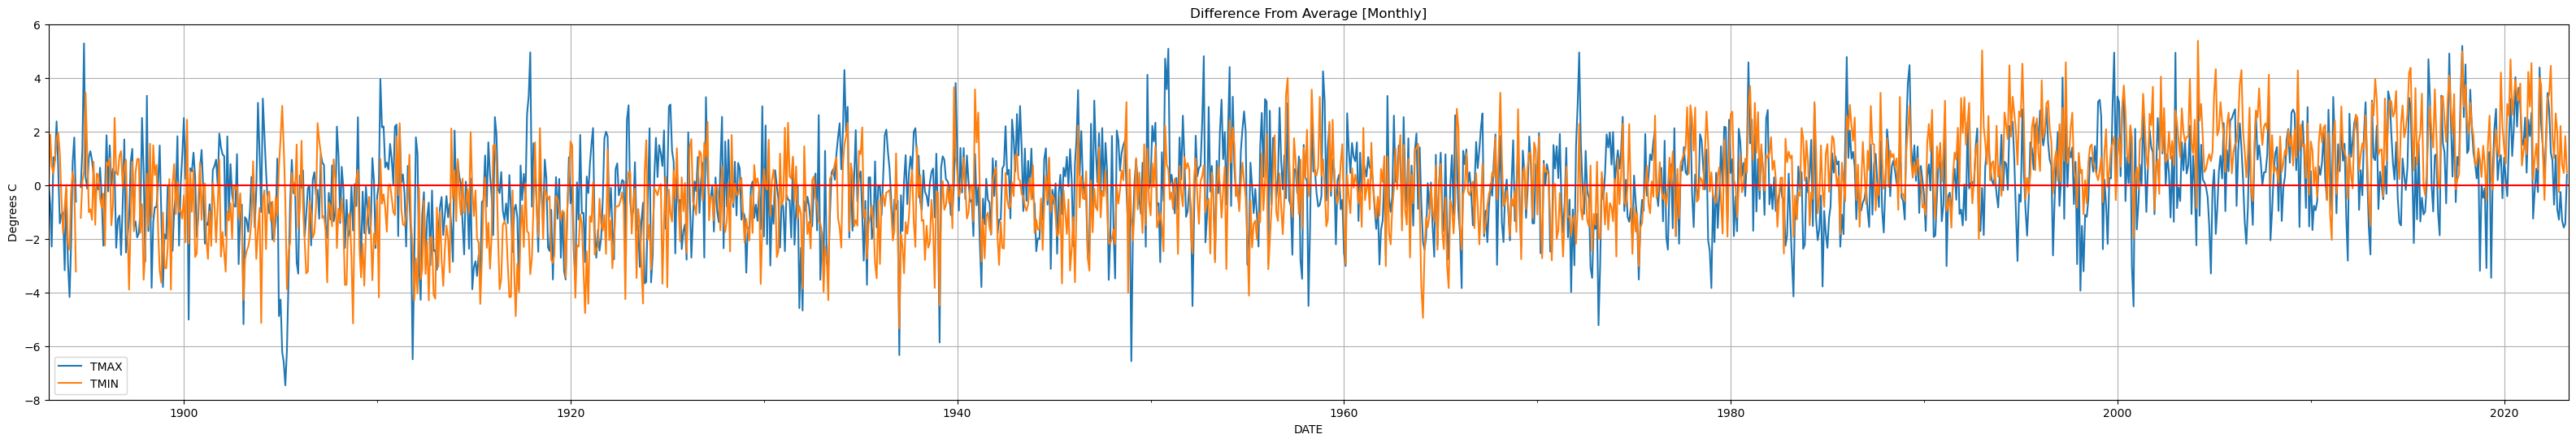

In [55]:
merged_df = merged_df.sort_values(by='DATE')
# Create the plot
fig, ax = plt.subplots(figsize=(40, 6))  # Set the plot width to twice the size
ax.plot(merged_df['DATE'], merged_df['TMAX_diff'], label='TMAX')
ax.plot(merged_df['DATE'], merged_df['TMIN_diff'], label='TMIN')

# Set ticks and labels for the x-axis
years = mdates.YearLocator(10)  # every 20 years
years_20 = mdates.YearLocator(20)  # every 40 years
years_fmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(years_20)
ax.xaxis.set_minor_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

# Set the y-axis limits
ax.set_ylim(-8, 6)
ax.set_xlim(mdates.date2num(datetime.strptime('1893-01', '%Y-%m')), 
            mdates.date2num(datetime.strptime('2023-05', '%Y-%m')))

# Draw a horizontal line at y=0 in red color
ax.axhline(y=0, color='red')

# Other plot settings
plt.xlabel('DATE')
plt.ylabel('Degrees C')  # Change Y-axis label
plt.title('Tucson Difference From Average [Monthly]')  # Change the title
plt.legend()
plt.grid()
plt.show()


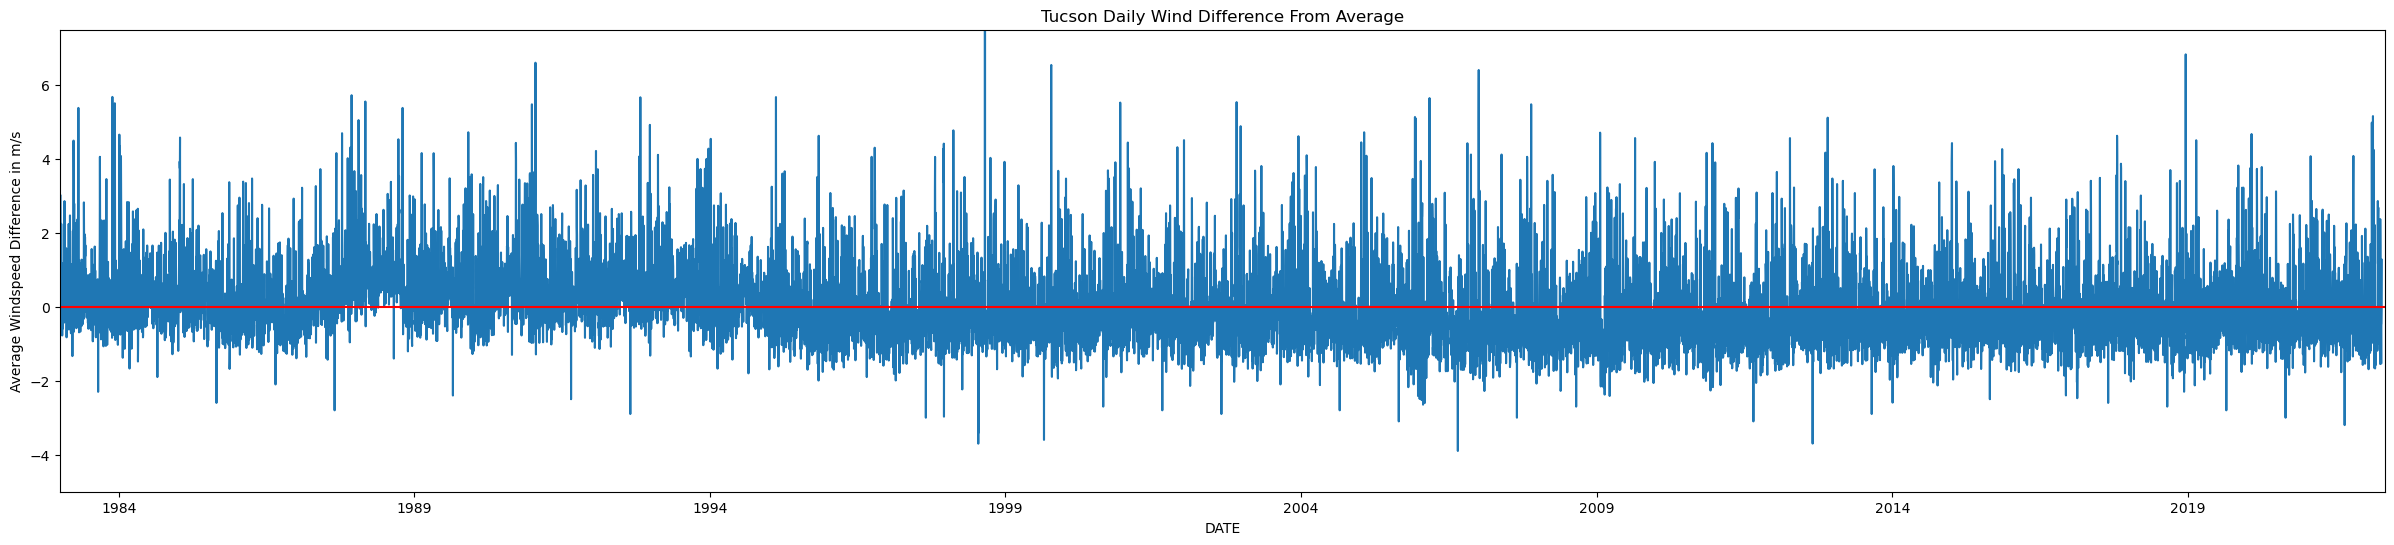

In [65]:
diff_table['DATE'] = pd.to_datetime(diff_table['DATE'])
diff_table = diff_table.sort_values(by='DATE')

fig, ax = plt.subplots(figsize=(30,6))

ax.plot(diff_table['DATE'], diff_table['AWND_diff'])

# Set the x-axis label to display every 5 years
start_year = diff_table['DATE'].dt.year.min()
end_year = diff_table['DATE'].dt.year.max()
ax.set_xticks(pd.date_range(start=f'{start_year}-01-01', end=f'{end_year}-01-01', freq='5Y'))
# Format the x-axis labels to display only the year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.set_xlim(mdates.date2num(datetime.strptime('1984-01', '%Y-%m')), 
            mdates.date2num(datetime.strptime('2023-05', '%Y-%m')))
ax.set_ylim(-5, 7.5)

# Draw a horizontal line at y=0 in red color
ax.axhline(y=0, color='red')


plt.xlabel('DATE')
plt.ylabel('Average Windspeed Difference in m/s')  # Change Y-axis label
plt.title('Tucson Daily Wind Difference From Average')  # Change the title

plt.show()
